In [115]:
## Data Formatting and Pre-processing(Binning, MInMax Scaling) of Raman Spectrum
## Convert dataset into Tidy Format for CIMCB
# Python notebook for Urine Raman spectra (Panc Cancer) Data Set
# https://www.kaggle.com/kritikaaggarwal/complete-analysis-and-prediction-on-tumors
# https://github.com/EBjerrum/Deep-Chemometrics/blob/master/Deep_Chemometrics_with_data_augmentation.py.ipynb

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns

import sklearn as skl
from scipy.io import loadmat
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm 

In [116]:
#Load the data
df_i = pd.read_excel('./Prostate_0331_rawdata.xlsx')
df_i.shape

(1902, 80)

In [117]:
df_i.columns

Index(['wavenumber', 'Pros 2', 'Pros 3', 'Pros 4', 'Pros 5', 'Pros 6',
       'Pros 11', 'Pros 12', 'Pros 24', 'Pros 25', 'Pros 26', 'Pros 27',
       'Pros 28', 'Pros 32', 'Pros 33', 'Pros 34', 'Pros 35', 'Pros 36',
       'Pros 39', 'Pros 40', 'Pros 19', 'Pros 20', 'Pros 21', 'Pros 22',
       'Pros 23', 'Pros 29', 'Pros 30', 'Pros 31', 'Pros 37', 'Pros 38',
       'Pros 1', 'Pros 7', 'Pros 8', 'Pros 9', 'Pros 10', 'Pros 14', 'Pros 15',
       'Pros 16', 'Pros 17', 'Pros 18', 'Normal 41', 'Normal 45', 'Normal 46',
       'Normal 28', 'Normal 30', 'Normal 31', 'Normal 51', 'Normal 52',
       'Normal 1', 'Normal 2', 'Normal 3', 'Normal 4', 'Normal 5', 'Normal 6',
       'Normal 7', 'Normal 8', 'Normal 9', 'Normal 10', 'Normal 11',
       'Normal 12', 'Normal 13', 'Normal 14', 'Normal 15', 'Normal 16',
       'Normal 18', 'Normal 19', 'Normal 20', 'Normal 21', 'Normal 22',
       'Normal 23', 'Normal 24', 'Normal 25', 'Normal 26', 'Normal 27',
       'Normal 28.1', 'Normal 29', 'Normal

In [118]:
df_i

,wavenumber,Pros 2,Pros 3,Pros 4,Pros 5,Pros 6,Pros 11,Pros 12,Pros 24,Pros 25,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
0,PN,P,P,P,P,P,P,P,P,P,...,N,N,N,N,N,N,N,N,N,N
1,400,291.167,160.067,360.333,251.633,237.8,154.833,357.333,236,319.167,...,642.133,543.767,344.033,457.967,648.067,152.067,747.033,1042.83,827.9,553.4
2,401,289.767,163,360.067,260.333,244.3,153.967,356.367,233.5,319.1,...,643.067,549.867,345.5,447.1,653.367,158.433,756.367,1039.8,829.067,556.133
3,402,286.933,164.767,360.467,260.167,249.1,155.767,345.033,227.833,320.367,...,612.9,568.133,339.867,428.1,646.467,155.267,745.033,1011.4,813.067,555.2
4,403,283.667,166.233,361.1,257.3,253.367,158.267,330.7,221.3,322.133,...,573.667,589.967,332.267,406.8,635.9,149.2,727.433,975.567,791.933,553.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,2296,81.3667,57.3667,79.7667,72.8,59.4,55.3667,62.0333,66.7,73.7667,...,101.8,134.6,70.6,134.533,92.4,60,107.733,178.2,152.167,114.533
1898,2297,81.4333,54.2667,80.3667,74.1333,68.6,53.6,59.6667,71,70.3,...,103.067,133.6,70.6,136.3,92.4,55.2,103.5,178.2,152.167,114.533
1899,2298,78.6333,49.2,80.6667,70.9,74.5,51.2667,64.3333,67.2,67.7667,...,98.4667,130.8,78.7667,128.467,97.7333,54.6,93.2,178.2,152.167,121.833
1900,2299,78.6333,50.2667,79.7667,70.9,74.5333,49.7,66.9,59.8667,67.7667,...,98.4667,127.433,85.5333,136.733,106,53.2333,93.2,178.2,152.167,126


In [119]:
y = df_i.iloc[0, 1:] # store the output label
# crop only the intensity values before scaling and data augmentation
df_j = df_i.drop([0,])
wv = df_j['wavenumber'] # store the wavenumber
df_k = df_j.drop(['wavenumber'],axis = 1)
df_k

,Pros 2,Pros 3,Pros 4,Pros 5,Pros 6,Pros 11,Pros 12,Pros 24,Pros 25,Pros 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
1,291.167,160.067,360.333,251.633,237.8,154.833,357.333,236,319.167,267.833,...,642.133,543.767,344.033,457.967,648.067,152.067,747.033,1042.83,827.9,553.4
2,289.767,163,360.067,260.333,244.3,153.967,356.367,233.5,319.1,269.5,...,643.067,549.867,345.5,447.1,653.367,158.433,756.367,1039.8,829.067,556.133
3,286.933,164.767,360.467,260.167,249.1,155.767,345.033,227.833,320.367,271.5,...,612.9,568.133,339.867,428.1,646.467,155.267,745.033,1011.4,813.067,555.2
4,283.667,166.233,361.1,257.3,253.367,158.267,330.7,221.3,322.133,273.567,...,573.667,589.967,332.267,406.8,635.9,149.2,727.433,975.567,791.933,553.233
5,280.4,167.533,361.967,253.7,256.967,160.767,318.533,215.7,323.467,275.433,...,538.8,609.767,326.233,388.167,625.5,143.133,710.5,942.567,771.5,551.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,81.3667,57.3667,79.7667,72.8,59.4,55.3667,62.0333,66.7,73.7667,67.1667,...,101.8,134.6,70.6,134.533,92.4,60,107.733,178.2,152.167,114.533
1898,81.4333,54.2667,80.3667,74.1333,68.6,53.6,59.6667,71,70.3,69.4667,...,103.067,133.6,70.6,136.3,92.4,55.2,103.5,178.2,152.167,114.533
1899,78.6333,49.2,80.6667,70.9,74.5,51.2667,64.3333,67.2,67.7667,67.2333,...,98.4667,130.8,78.7667,128.467,97.7333,54.6,93.2,178.2,152.167,121.833
1900,78.6333,50.2667,79.7667,70.9,74.5333,49.7,66.9,59.8667,67.7667,64.0667,...,98.4667,127.433,85.5333,136.733,106,53.2333,93.2,178.2,152.167,126


In [120]:
df_P = df_k.filter(like = 'Pro', axis = 1)
df_N = df_k.filter(like = 'Nor', axis = 1)

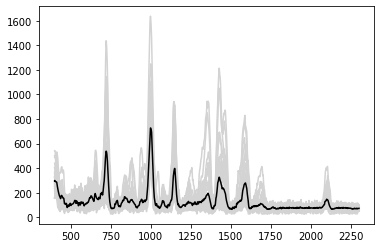

In [121]:
%matplotlib inline
_ = plt.plot(wv, df_P, color='lightgray')
_ = plt.plot(wv, df_P.mean(axis=1), color='black')

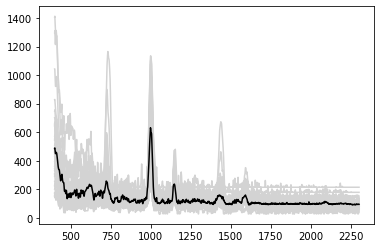

In [122]:
%matplotlib inline
_ = plt.plot(wv, df_N, color='lightgray')
_ = plt.plot(wv, df_N.mean(axis=1), color='black')

In [123]:
# Ramsn shift range selection
wv_c = wv[(wv >= 450) & (wv <= 2250)]
df_c = df_k[(df_j['wavenumber'] >= 450) & (df_j['wavenumber'] <= 2250) ]

In [124]:
df_c.index = wv_c

In [125]:
df_c

,Pros 2,Pros 3,Pros 4,Pros 5,Pros 6,Pros 11,Pros 12,Pros 24,Pros 25,Pros 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
wavenumber,,,,,,,,,,,,,,,,,,,,,
450,153.167,119.1,159.267,216.633,161.9,103.633,194.533,127.5,132.733,220.267,...,257.067,303,242.7,144.267,434.567,192.367,559.733,284.7,325.433,145.4
451,157.7,111.567,167.633,213.333,157.2,101.9,196.433,126.433,133.333,203.667,...,266.167,297.9,236.367,140.2,440.6,191.333,554.767,260.667,330.133,152.533
452,162,103.667,176.667,209.867,152.467,100.2,198.833,125.267,134.4,186.4,...,277.8,293.9,229.967,136.333,447.067,189.733,549.2,237.933,336.533,161.467
453,166.267,96.5667,182.1,208,150.3,99.4667,200.967,122.367,137.9,171.667,...,289.4,288.367,225.267,131.7,452.333,188.133,543.367,223.167,339.1,167.533
454,170.3,92,176.8,210.667,156,101.7,202.3,114.5,148.433,164.767,...,300.733,278.367,225.633,124.833,453.867,186.7,536.6,231.867,330.367,164.633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,84.1333,55.2333,82.7333,70.9,61.8667,50.3333,75.2,59.9667,70.9667,65.5333,...,112.467,127.433,87.9667,120.967,92.4,60.7,103.633,178.2,152.167,124.667
2247,82.6,49.2,83.0333,70.9,52.0667,55.2,72.4333,63.8,67.7667,64.0667,...,105.033,127.433,86.8,120.967,92.4,63.3,111.533,178.2,152.167,132.6
2248,78.6333,50.4,88.9,74.5,52.0667,57.5,72.7,63.8,67.7667,67.2667,...,98.4667,127.433,79.3,120.967,92.4,49.3333,108.567,178.2,152.167,136.633


In [126]:
wv_c = wv_c.astype(float)

In [127]:
wv_c.shape

(1801,)

In [128]:
df_d = df_c.astype(float)

In [129]:
df_e = df_d.values.T.tolist()

In [130]:
# Bining (bucketing) for smoothing and reducing the number of variables
# The original data were measured at every 1 cm-1. But the spectral resolution of CBEx is 14~16 cm-1
# So, the data averaging within 2 cm-1 is still effective 1800 data set (450~2150 cm-1) down to 900 data set for every 2 cm-1

from scipy.stats import binned_statistic
df_binned, bin_edges, misc = binned_statistic(wv_c, df_e, statistic="mean", bins=900)
wv_binned = (bin_edges[:-1]+bin_edges[1:])/2

In [131]:
df_binned

array([[155.433335  , 164.133335  , 172.283335  , ...,  86.3       ,
         83.366665  ,  78.83333   ],
       [115.333335  , 100.11667   ,  90.45      , ...,  68.383335  ,
         52.216665  ,  54.05555667],
       [163.45      , 179.383335  , 171.083335  , ...,  83.416665  ,
         82.88333   ,  94.95555667],
       ...,
       [272.683335  , 230.55      , 242.9       , ..., 178.2       ,
        178.2       , 178.2       ],
       [327.78333   , 337.816665  , 322.75      , ..., 153.25      ,
        152.16667   , 152.16667   ],
       [148.966665  , 164.5       , 160.68333   , ..., 118.383335  ,
        128.633335  , 134.68888667]])

In [132]:
pd.DataFrame(df_binned)

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,155.433335,164.133335,172.283335,177.200000,147.516665,98.366670,95.833335,124.483330,137.083335,136.400000,...,78.816665,82.700000,88.016665,88.866670,91.500000,82.350000,78.63333,86.300000,83.366665,78.833330
1,115.333335,100.116670,90.450000,84.866670,82.383335,82.316665,87.083335,94.366670,91.733335,82.016665,...,78.233335,66.933330,56.300000,58.000000,60.250000,55.550000,55.80000,68.383335,52.216665,54.055557
2,163.450000,179.383335,171.083335,146.783330,125.516665,108.333335,111.516665,128.283335,134.900000,138.750000,...,79.766670,79.766670,81.366670,90.933335,92.766670,79.766670,80.55000,83.416665,82.883330,94.955557
3,214.983330,208.933335,213.300000,222.550000,207.950000,178.283330,163.116670,159.000000,161.733330,168.383335,...,79.266670,76.533335,76.116665,73.850000,86.283335,78.733335,74.75000,70.900000,70.900000,78.277777
4,159.550000,151.383335,161.033335,180.666665,179.650000,164.266670,148.233335,132.600000,121.183335,115.850000,...,56.416665,59.716665,57.416670,59.566665,58.416670,58.266665,67.80000,77.666670,56.966670,53.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,191.850000,188.933330,186.016665,183.733335,185.716670,188.800000,170.350000,138.566665,125.683335,127.366670,...,66.016665,67.333335,57.400000,60.000000,56.900000,50.300000,49.33333,56.716670,62.000000,49.855553
75,557.250000,546.283335,532.983335,517.200000,487.166665,448.450000,420.383335,401.266670,399.016665,401.566665,...,114.316670,117.833335,93.200000,93.200000,93.200000,94.916665,93.20000,94.500000,107.583330,106.711113
76,272.683335,230.550000,242.900000,284.966670,260.233335,193.083335,168.833330,175.866665,178.200000,178.200000,...,178.200000,178.200000,178.200000,178.200000,178.200000,178.200000,178.20000,178.200000,178.200000,178.200000
77,327.783330,337.816665,322.750000,289.133335,238.933335,182.733335,184.400000,221.266665,208.300000,160.783335,...,152.166670,152.166670,154.933330,152.166670,152.616670,152.516670,152.16667,153.250000,152.166670,152.166670


In [133]:
df_b = pd.DataFrame(df_binned.T, columns = df_c.columns, index = wv_binned)
df_b

,Pros 2,Pros 3,Pros 4,Pros 5,Pros 6,Pros 11,Pros 12,Pros 24,Pros 25,Pros 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
451.0,155.433335,115.333335,163.450000,214.983330,159.550000,102.766665,195.483330,126.966665,133.03333,211.966670,...,261.616670,300.450000,239.533335,142.233335,437.583335,191.850000,557.250000,272.683335,327.783330,148.966665
453.0,164.133335,100.116670,179.383335,208.933335,151.383335,99.833335,199.900000,123.816670,136.15000,179.033335,...,283.600000,291.133335,227.616670,134.016665,449.700000,188.933330,546.283335,230.550000,337.816665,164.500000
455.0,172.283335,90.450000,171.083335,213.300000,161.033335,103.683335,202.666665,109.066665,155.73333,163.483335,...,306.316665,272.100000,227.250000,120.716665,453.633335,186.016665,532.983335,242.900000,322.750000,160.683330
457.0,177.200000,84.866670,146.783330,222.550000,180.666665,110.516665,203.066665,87.550000,181.10000,159.650000,...,324.000000,245.966670,232.916665,105.083335,449.433335,183.733335,517.200000,284.966670,289.133335,144.083335
459.0,147.516665,82.383335,125.516665,207.950000,179.650000,99.016670,190.400000,76.700000,148.30000,157.083330,...,286.233335,215.683335,219.500000,103.083335,413.833330,185.716670,487.166665,260.233335,238.933335,134.183330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241.0,82.350000,55.550000,79.766670,78.733335,58.266665,51.916670,71.850000,70.183330,73.65000,64.066670,...,98.466670,131.800000,70.600000,134.450000,93.466665,50.300000,94.916665,178.200000,152.516670,114.533330
2243.0,78.633330,55.800000,80.550000,74.750000,67.800000,47.500000,59.666670,66.083335,74.30000,66.766665,...,98.750000,127.433330,70.600000,141.566665,92.400000,49.333330,93.200000,178.200000,152.166670,116.850000
2245.0,86.300000,68.383335,83.416665,70.900000,77.666670,46.116665,73.283330,64.066665,71.11667,66.016665,...,111.483335,127.433330,82.283335,136.516665,92.400000,56.716670,94.500000,178.200000,153.250000,118.383335
2247.0,83.366665,52.216665,82.883330,70.900000,56.966670,52.766665,73.816665,61.883335,69.36667,64.800000,...,108.750000,127.433330,87.383335,120.966670,92.400000,62.000000,107.583330,178.200000,152.166670,128.633335


In [134]:
# Normalization by MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_b)
df_scaled = scaler.transform(df_b)

In [135]:
df_s = pd.DataFrame(df_scaled, columns = df_b.columns, index = df_b.index)

In [136]:
df_s

,Pros 2,Pros 3,Pros 4,Pros 5,Pros 6,Pros 11,Pros 12,Pros 24,Pros 25,Pros 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
451.0,0.131714,0.117202,0.173539,0.240172,0.157539,0.085757,0.234963,0.142828,0.138503,0.260510,...,0.352059,0.320956,0.329241,0.100854,0.955569,0.167947,1.000000,0.243808,0.385716,0.129279
453.0,0.146634,0.090235,0.206581,0.230088,0.145569,0.081430,0.242604,0.136428,0.144415,0.202501,...,0.399496,0.303673,0.306016,0.079687,0.989111,0.164509,0.976367,0.144892,0.407753,0.187598
455.0,0.160612,0.073104,0.189369,0.237366,0.159713,0.087109,0.247391,0.106461,0.181562,0.175112,...,0.448516,0.268365,0.305301,0.045425,1.000000,0.161072,0.947707,0.173886,0.374661,0.173268
457.0,0.169044,0.063209,0.138976,0.252785,0.188489,0.097190,0.248083,0.062745,0.229680,0.168360,...,0.486675,0.219886,0.316345,0.005152,0.988373,0.158382,0.913695,0.272645,0.300827,0.110944
459.0,0.118136,0.058808,0.094874,0.228448,0.186999,0.080225,0.226169,0.040702,0.167462,0.163839,...,0.405179,0.163709,0.290197,0.000000,0.889822,0.160719,0.848975,0.214579,0.190570,0.073775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241.0,0.006374,0.011254,0.000000,0.013057,0.009087,0.010744,0.021077,0.027462,0.025861,0.000000,...,0.000000,0.008100,0.000000,0.080804,0.002953,0.001139,0.003699,0.021990,0.000769,0.000000
2243.0,0.000000,0.011697,0.001624,0.006418,0.023060,0.004229,0.000000,0.019132,0.027094,0.004756,...,0.000611,0.000000,0.000000,0.099137,0.000000,0.000000,0.000000,0.021990,0.000000,0.008698
2245.0,0.013148,0.033997,0.007569,0.000000,0.037522,0.002188,0.023557,0.015035,0.021055,0.003435,...,0.028088,0.000000,0.022770,0.086128,0.000000,0.008701,0.002801,0.021990,0.002379,0.014455
2247.0,0.008118,0.005346,0.006463,0.000000,0.007182,0.011998,0.024480,0.010599,0.017736,0.001292,...,0.022190,0.000000,0.032710,0.046069,0.000000,0.014927,0.030995,0.021990,0.000000,0.052938


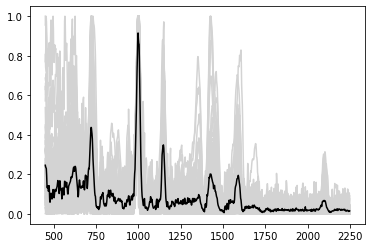

In [137]:
%matplotlib inline
_ = plt.plot(wv_binned, df_s, color='lightgray')
_ = plt.plot(wv_binned, df_s.mean(axis=1), color='black')

In [138]:
# Convert the dataframe into Tidy format

In [139]:
df = df_s.T
df.columns = wv_binned.astype(int)
df.columns = df.columns.astype(str) + 'cm-1'

In [140]:
df

,451cm-1,453cm-1,455cm-1,457cm-1,459cm-1,461cm-1,463cm-1,465cm-1,467cm-1,469cm-1,...,2231cm-1,2233cm-1,2235cm-1,2237cm-1,2239cm-1,2241cm-1,2243cm-1,2245cm-1,2247cm-1,2249cm-1
Pros 2,0.131714,0.146634,0.160612,0.169044,0.118136,0.033843,0.029498,0.078634,0.100243,0.099071,...,0.000314,0.006974,0.016093,0.017550,0.022067,0.006374,0.000000,0.013148,0.008118,0.000343
Pros 3,0.117202,0.090235,0.073104,0.063209,0.058808,0.058690,0.067137,0.080045,0.075378,0.058158,...,0.051453,0.031427,0.012583,0.015595,0.019583,0.011254,0.011697,0.033997,0.005346,0.008605
Pros 4,0.173539,0.206581,0.189369,0.138976,0.094874,0.059240,0.065842,0.100612,0.114333,0.122317,...,0.000000,0.000000,0.003318,0.023157,0.026959,0.000000,0.001624,0.007569,0.006463,0.031498
Pros 5,0.240172,0.230088,0.237366,0.252785,0.228448,0.178997,0.153716,0.146854,0.151410,0.162495,...,0.013946,0.009390,0.008696,0.004917,0.025642,0.013057,0.006418,0.000000,0.000000,0.012298
Pros 6,0.157539,0.145569,0.159713,0.188489,0.186999,0.164452,0.140952,0.118038,0.101304,0.093487,...,0.006376,0.011213,0.007842,0.010993,0.009307,0.009087,0.023060,0.037522,0.007182,0.002785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal 29,0.167947,0.164509,0.161072,0.158382,0.160719,0.164352,0.142610,0.105156,0.089973,0.091957,...,0.019660,0.021212,0.009506,0.012570,0.008917,0.001139,0.000000,0.008701,0.014927,0.000615
Normal 30.1,1.000000,0.976367,0.947707,0.913695,0.848975,0.765543,0.705061,0.663865,0.659017,0.664512,...,0.045505,0.053083,0.000000,0.000000,0.000000,0.003699,0.000000,0.002801,0.030995,0.029116
Normal 31.1,0.243808,0.144892,0.173886,0.272645,0.214579,0.056932,0.000000,0.016512,0.021990,0.021990,...,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990
Normal 17,0.385716,0.407753,0.374661,0.300827,0.190570,0.067135,0.070796,0.151768,0.123289,0.018925,...,0.000000,0.000000,0.006077,0.000000,0.000988,0.000769,0.000000,0.002379,0.000000,0.000000


In [141]:
df.insert(0,'Class', y)
df

,Class,451cm-1,453cm-1,455cm-1,457cm-1,459cm-1,461cm-1,463cm-1,465cm-1,467cm-1,...,2231cm-1,2233cm-1,2235cm-1,2237cm-1,2239cm-1,2241cm-1,2243cm-1,2245cm-1,2247cm-1,2249cm-1
Pros 2,P,0.131714,0.146634,0.160612,0.169044,0.118136,0.033843,0.029498,0.078634,0.100243,...,0.000314,0.006974,0.016093,0.017550,0.022067,0.006374,0.000000,0.013148,0.008118,0.000343
Pros 3,P,0.117202,0.090235,0.073104,0.063209,0.058808,0.058690,0.067137,0.080045,0.075378,...,0.051453,0.031427,0.012583,0.015595,0.019583,0.011254,0.011697,0.033997,0.005346,0.008605
Pros 4,P,0.173539,0.206581,0.189369,0.138976,0.094874,0.059240,0.065842,0.100612,0.114333,...,0.000000,0.000000,0.003318,0.023157,0.026959,0.000000,0.001624,0.007569,0.006463,0.031498
Pros 5,P,0.240172,0.230088,0.237366,0.252785,0.228448,0.178997,0.153716,0.146854,0.151410,...,0.013946,0.009390,0.008696,0.004917,0.025642,0.013057,0.006418,0.000000,0.000000,0.012298
Pros 6,P,0.157539,0.145569,0.159713,0.188489,0.186999,0.164452,0.140952,0.118038,0.101304,...,0.006376,0.011213,0.007842,0.010993,0.009307,0.009087,0.023060,0.037522,0.007182,0.002785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal 29,N,0.167947,0.164509,0.161072,0.158382,0.160719,0.164352,0.142610,0.105156,0.089973,...,0.019660,0.021212,0.009506,0.012570,0.008917,0.001139,0.000000,0.008701,0.014927,0.000615
Normal 30.1,N,1.000000,0.976367,0.947707,0.913695,0.848975,0.765543,0.705061,0.663865,0.659017,...,0.045505,0.053083,0.000000,0.000000,0.000000,0.003699,0.000000,0.002801,0.030995,0.029116
Normal 31.1,N,0.243808,0.144892,0.173886,0.272645,0.214579,0.056932,0.000000,0.016512,0.021990,...,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990
Normal 17,N,0.385716,0.407753,0.374661,0.300827,0.190570,0.067135,0.070796,0.151768,0.123289,...,0.000000,0.000000,0.006077,0.000000,0.000988,0.000769,0.000000,0.002379,0.000000,0.000000


In [142]:
df.reset_index(inplace = True)
df.index = df.index +1
df.rename(columns = {'index': 'SampleID'}, inplace = True)
df.index.name = 'Idx'
df.insert(1,'SampleType','Sample')

In [143]:
df

,SampleID,SampleType,Class,451cm-1,453cm-1,455cm-1,457cm-1,459cm-1,461cm-1,463cm-1,...,2231cm-1,2233cm-1,2235cm-1,2237cm-1,2239cm-1,2241cm-1,2243cm-1,2245cm-1,2247cm-1,2249cm-1
Idx,,,,,,,,,,,,,,,,,,,,,
1,Pros 2,Sample,P,0.131714,0.146634,0.160612,0.169044,0.118136,0.033843,0.029498,...,0.000314,0.006974,0.016093,0.017550,0.022067,0.006374,0.000000,0.013148,0.008118,0.000343
2,Pros 3,Sample,P,0.117202,0.090235,0.073104,0.063209,0.058808,0.058690,0.067137,...,0.051453,0.031427,0.012583,0.015595,0.019583,0.011254,0.011697,0.033997,0.005346,0.008605
3,Pros 4,Sample,P,0.173539,0.206581,0.189369,0.138976,0.094874,0.059240,0.065842,...,0.000000,0.000000,0.003318,0.023157,0.026959,0.000000,0.001624,0.007569,0.006463,0.031498
4,Pros 5,Sample,P,0.240172,0.230088,0.237366,0.252785,0.228448,0.178997,0.153716,...,0.013946,0.009390,0.008696,0.004917,0.025642,0.013057,0.006418,0.000000,0.000000,0.012298
5,Pros 6,Sample,P,0.157539,0.145569,0.159713,0.188489,0.186999,0.164452,0.140952,...,0.006376,0.011213,0.007842,0.010993,0.009307,0.009087,0.023060,0.037522,0.007182,0.002785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Normal 29,Sample,N,0.167947,0.164509,0.161072,0.158382,0.160719,0.164352,0.142610,...,0.019660,0.021212,0.009506,0.012570,0.008917,0.001139,0.000000,0.008701,0.014927,0.000615
76,Normal 30.1,Sample,N,1.000000,0.976367,0.947707,0.913695,0.848975,0.765543,0.705061,...,0.045505,0.053083,0.000000,0.000000,0.000000,0.003699,0.000000,0.002801,0.030995,0.029116
77,Normal 31.1,Sample,N,0.243808,0.144892,0.173886,0.272645,0.214579,0.056932,0.000000,...,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990,0.021990


In [144]:
wavenumber = df.columns[3:]
wavenumber

Index(['451cm-1', '453cm-1', '455cm-1', '457cm-1', '459cm-1', '461cm-1',
       '463cm-1', '465cm-1', '467cm-1', '469cm-1',
       ...
       '2231cm-1', '2233cm-1', '2235cm-1', '2237cm-1', '2239cm-1', '2241cm-1',
       '2243cm-1', '2245cm-1', '2247cm-1', '2249cm-1'],
      dtype='object', length=900)

In [145]:
df_peak = pd.DataFrame()
df_peak['Name'] = wavenumber
df_peak['Label'] = wavenumber
df_peak['Perc_missing'] = 0.
df_peak['QC_RSD'] = 0.

In [146]:
df_peak

,Name,Label,Perc_missing,QC_RSD
0,451cm-1,451cm-1,0.0,0.0
1,453cm-1,453cm-1,0.0,0.0
2,455cm-1,455cm-1,0.0,0.0
3,457cm-1,457cm-1,0.0,0.0
4,459cm-1,459cm-1,0.0,0.0
...,...,...,...,...
895,2241cm-1,2241cm-1,0.0,0.0
896,2243cm-1,2243cm-1,0.0,0.0
897,2245cm-1,2245cm-1,0.0,0.0
898,2247cm-1,2247cm-1,0.0,0.0


In [147]:
df_peak.index.rename = 'Idx'

In [148]:
df_peak.index = df_peak.index + 1
df_peak

,Name,Label,Perc_missing,QC_RSD
1,451cm-1,451cm-1,0.0,0.0
2,453cm-1,453cm-1,0.0,0.0
3,455cm-1,455cm-1,0.0,0.0
4,457cm-1,457cm-1,0.0,0.0
5,459cm-1,459cm-1,0.0,0.0
...,...,...,...,...
896,2241cm-1,2241cm-1,0.0,0.0
897,2243cm-1,2243cm-1,0.0,0.0
898,2245cm-1,2245cm-1,0.0,0.0
899,2247cm-1,2247cm-1,0.0,0.0


In [149]:
# write the dataset to excel file
with pd.ExcelWriter('./Pros2_Tidy_binned.xlsx') as writer:
    df.to_excel(writer,sheet_name="Data")
    df_peak.to_excel(writer,sheet_name="Peak")

In [50]:
## End of data setup to Tidy format

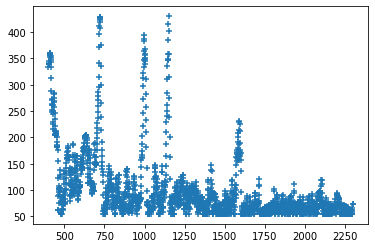

In [62]:
df_j = df_i.drop([0])
plt.scatter(df_j['wavenumber'], df_j['pro 19'], marker="+")

In [63]:
# How to reduce the dataset without loosing the key features
# Python spectroscopic data reduction module


In [339]:
from ChemUtils import GlobalStandardScaler 
xscaler = GlobalStandardScaler() #It works on a global scale, not per feature as is otherwise the norm for scikit-learn scalers.

df_s = xscaler.fit_transform(df)

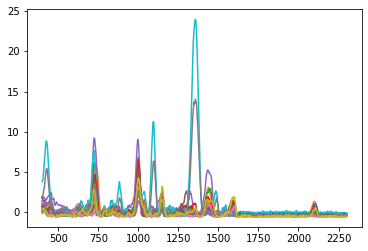

In [340]:
%matplotlib inline
_ = plt.plot(df_j['wavenumber'], df_s.T)

In [341]:
df_s.shape

(39, 1901)

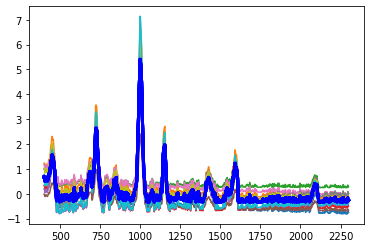

In [379]:
#Augmentation for all Spectra (X10)
X = df_s[0:1]
#Repeating the spectrum 10x
X = np.repeat(X, repeats=10, axis=0)
#Augment (Large pertubations for illustration)
X_aug = dataaugment(X, betashift = 0.5, slopeshift = 0.5,multishift = 0.5)
    
plt.plot(df_j['wavenumber'], X_aug.T)
_= plt.plot(df_j['wavenumber'], X.T, lw=3, c='b')

390


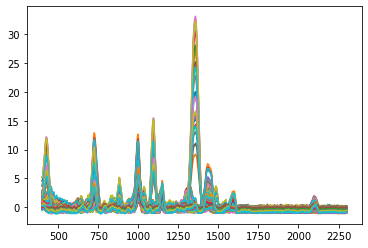

In [380]:
# data augmentation
# The idea is to simulate the expected form of irrelevant noise (here baseline offset and slope and overall spectrum intensity)
from ChemUtils import dataaugment

#Repeating the spectrum 10x
X = np.repeat(df_s, repeats=10, axis=0)
#Augment (with 40% for offset and multiplication, 20% of slopeshift)
X_aug = dataaugment(X, betashift = 0.4, slopeshift = 0.2,multishift = 0.4)
y_aug = np.repeat(y, repeats=10)
    
print(len(X_aug))
_= plt.plot(df_j['wavenumber'], X_aug.T)

In [381]:
type(X_aug)
df_x = pd.DataFrame(X_aug) # convert to pd.DataFrame
df_y = y_aug

In [382]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900
0,0.543335,0.542685,0.494366,0.432208,0.376201,0.351168,0.365894,0.392923,0.42039,0.445661,...,-0.542851,-0.553386,-0.576443,-0.472749,-0.411013,-0.444833,-0.505014,-0.536638,-0.535531,-0.524538
1,0.534722,0.534027,0.489793,0.432918,0.381661,0.358695,0.372045,0.396631,0.421619,0.4446,...,-0.648388,-0.658111,-0.679272,-0.584661,-0.528374,-0.559365,-0.614435,-0.64342,-0.64251,-0.63257
2,0.965621,0.964979,0.914744,0.85011,0.791876,0.765866,0.781222,0.809376,0.837987,0.864312,...,-0.0996452,-0.110572,-0.134525,-0.0266104,0.0376528,0.00250114,-0.0600754,-0.0929417,-0.0917555,-0.080285
3,0.753673,0.752969,0.703173,0.639126,0.581413,0.555597,0.570728,0.598528,0.62678,0.65277,...,-0.431184,-0.442068,-0.465848,-0.359096,-0.295553,-0.330417,-0.392428,-0.425031,-0.423925,-0.41264
4,0.64544,0.644728,0.587494,0.513851,0.447501,0.417876,0.435396,0.467502,0.500129,0.530151,...,-0.532619,-0.545052,-0.572333,-0.449324,-0.376065,-0.416108,-0.487407,-0.524845,-0.523474,-0.510383
5,0.616838,0.616166,0.574312,0.520502,0.472006,0.450269,0.462882,0.486122,0.509743,0.531465,...,-0.529401,-0.538613,-0.558642,-0.469168,-0.415942,-0.44527,-0.497372,-0.524803,-0.523956,-0.514569
6,0.671104,0.670495,0.620006,0.555035,0.496501,0.470378,0.48586,0.514214,0.543028,0.569544,...,-0.32966,-0.340612,-0.364667,-0.25609,-0.191416,-0.226735,-0.289636,-0.322656,-0.321425,-0.309851
7,0.261043,0.260589,0.231489,0.194071,0.16035,0.145243,0.154031,0.170212,0.186656,0.201781,...,-0.510014,-0.516408,-0.530327,-0.468073,-0.431034,-0.451421,-0.487651,-0.506718,-0.506115,-0.499572
8,0.544763,0.543954,0.48864,0.417501,0.353396,0.324706,0.341478,0.372317,0.403657,0.432486,...,-0.822511,-0.834624,-0.861053,-0.742555,-0.672031,-0.710768,-0.779646,-0.815871,-0.814671,-0.802169
9,0.14838,0.148128,0.122752,0.0900817,0.0606532,0.04755,0.0554035,0.0697407,0.0843095,0.0977205,...,-0.251414,-0.256876,-0.268937,-0.214191,-0.181561,-0.199295,-0.230923,-0.2475,-0.246825,-0.24094


In [383]:
display(y_aug)

n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
         ..
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
Name: 0, Length: 390, dtype: object

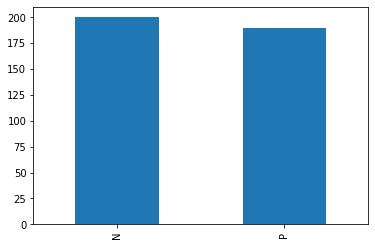

In [384]:
df_y.value_counts().plot(kind ="bar")

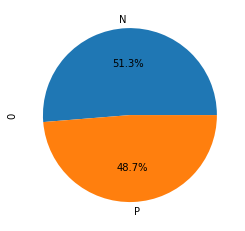

In [385]:
y.value_counts().plot(kind ="pie",autopct='%1.1f%%')

In [386]:
# Classification Analysis
# split the data now
xtrain,xtest,ytrain,ytest = train_test_split(df_x,df_y,test_size = 0.3,random_state = 1)

In [387]:
# FITTING & TESTING THE CLASSIFICATION MODELS (without scaling the data)
print('Classification without scaling')
#decision tree
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))

#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))

#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))

#logistic regression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(ypred,ytest))

#PLS Discriminant Analysis
binary_ytrain = (ytrain == 'N').astype('uint8') # assign 'P' to 0, 'N' to 1
binary_ytest = (ytest == 'N').astype('uint8')
PLS = PLSRegression(n_components=5)
PLS.fit(xtrain,binary_ytrain)
ypred = PLS.predict(xtest) # these won't generally be integer numbers
binary_ypred = (PLS.predict(xtest) > 0.5).astype('uint8')
print('PLS-DA:: ',metrics.accuracy_score(binary_ypred,binary_ytest))

Classification without scaling
DECISION TREE CLASSIFIER::  0.9316239316239316
FORSEST TREE CLASSIFICATION::  0.9401709401709402
SUPPORT VECTOR MACHINE::  0.8632478632478633


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


K NEAREST NEIGHBOURS::  0.9230769230769231
NAIVE BAYES ALGORITHM::  0.6495726495726496
LOGISTIC REGRESSION::  1.0
PLS-DA::  0.9487179487179487


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [388]:
# FITTING & TESTING THE CLASSIFICATION MODELS AFTER SCALING
sc = StandardScaler()
df_x = sc.fit_transform(df_x)
xtrain,xtest,ytrain,ytest = train_test_split(df_x,df_y,test_size = 0.3,random_state = 1)

print('Classification after scaling')

#decision tree
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))


#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))

#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))

#logistic regression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(ypred,ytest))

#PLS Discriminant Analysis
binary_ytrain = (ytrain == 'N').astype('uint8') # assign 'P' to 0, 'N' to 1
binary_ytest = (ytest == 'N').astype('uint8')
PLS = PLSRegression(n_components=5)
PLS.fit(xtrain,binary_ytrain)
ypred = PLS.predict(xtest) # these won't generally be integer numbers
binary_ypred = (PLS.predict(xtest) > 0.5).astype('uint8')
print('PLS-DA:: ',metrics.accuracy_score(binary_ypred,binary_ytest))

Classification after scaling
DECISION TREE CLASSIFIER::  0.9316239316239316
FORSEST TREE CLASSIFICATION::  0.9316239316239316
SUPPORT VECTOR MACHINE::  0.9316239316239316


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


K NEAREST NEIGHBOURS::  0.8974358974358975
NAIVE BAYES ALGORITHM::  0.6495726495726496
LOGISTIC REGRESSION::  1.0
PLS-DA::  0.9487179487179487


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [389]:
#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))
metrics.confusion_matrix(ytest,prediction)

SUPPORT VECTOR MACHINE::  0.9316239316239316


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[53,  2],
       [ 6, 56]], dtype=int64)

In [390]:
#logistic regression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,ypred)

LOGISTIC REGRESSION::  1.0


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[55,  0],
       [ 0, 62]], dtype=int64)

In [391]:
#PLS Discriminant Analysis
binary_ytrain = (ytrain == 'N').astype('uint8') # assign 'P' to 0, 'N' to 1
binary_ytest = (ytest == 'N').astype('uint8')
PLS = PLSRegression(n_components=5)
PLS.fit(xtrain,binary_ytrain)
ypred = PLS.predict(xtest) # these won't generally be integer numbers
binary_ypred = (PLS.predict(xtest) > 0.5).astype('uint8')
print('PLS-DA:: ',metrics.accuracy_score(binary_ypred,binary_ytest))
metrics.confusion_matrix(binary_ytest,binary_ypred)

PLS-DA::  0.9487179487179487


array([[56,  6],
       [ 0, 55]], dtype=int64)

In [ ]:
# Convolutional Neural Network algorithm
